In [1]:
from pymc import DiscreteUniform, Exponential, deterministic, Poisson, Uniform
import numpy as np
from pymc.graph import dag, graph
import pydot


In [2]:
 %pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
disasters_array =   \
     np.array([ 4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
                   3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
                   2, 2, 3, 4, 2, 1, 3, 2, 2, 1, 1, 1, 1, 3, 0, 0,
                   1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
                   0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
                   3, 3, 1, 1, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
                   0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])



In [4]:
def make_model():
    switchpoint = DiscreteUniform('switchpoint', lower=0, upper=110, doc = 'SwitchPoint[year]')
    early_mean = Exponential('early_mean', beta=1.)
    late_mean = Exponential('late_mean', beta=1.)
    
    @deterministic
    def rate(s=switchpoint, e=early_mean, l=late_mean):
        '''Concatenate Poisson mean'''
        out = np.empty(len(disasters_array))
        out[:s] = e
        out[s:] = l
        return out
    disasters = Poisson('disasters', mu=rate, value =disasters_array, observed=True)
    return locals()
    

In [17]:
# Initialization
observed_values = [1.]

rain = pymc.Bernoulli('rain', .2, value=np.ones(len(observed_values)))

p_sprinkler = pymc.Lambda('p_sprinkler', lambda rain=rain: np.where(rain, .01, .4))

# "Real" sprinkler varible
sprinkler = pymc.Bernoulli('sprinkler', p_sprinkler, value=np.ones(len(observed_values)))

p_grass_wet = pymc.Lambda('p_grass_wet', lambda sprinkler=sprinkler, rain=rain: np.where(sprinkler, np.where(rain, .99, .9), 
                                                                                         np.where(rain, .8, 0.2)))
grass_wet = pymc.Bernoulli('grass_wet', p_grass_wet, value=observed_values, observed=True)

model = pymc.Model([grass_wet, p_grass_wet, sprinkler, p_sprinkler, rain])



In [5]:
import pydot
pydot.find_graphviz()

AttributeError: 'module' object has no attribute 'find_graphviz'

In [1]:
from pymc import Model
from IPython.display import Image, display
model = Model(make_model())
graph1 = graph(model,size = "7.75,10.25")
Image(graph1.create_png())


NameError: name 'make_model' is not defined

In [15]:
from pymc import MCMC
M = MCMC(model)

In [16]:
M.sample(iter=10000, burn=1000, thin=10)

 [-----------------100%-----------------] 10000 of 10000 complete in 1.6 sec

In [17]:
M.trace('switchpoint')[:]

array([41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41,
       41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41,
       41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41,
       41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41,
       41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41,
       41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 39,
       41, 41, 40, 41, 42, 41, 41, 38, 40, 41, 41, 42, 41, 41, 39, 41, 36,
       41, 43, 42, 39, 42, 36, 40, 36, 36, 37, 39, 42, 41, 39, 40, 39, 40,
       40, 38, 42, 41, 40, 41, 41, 39, 39, 42, 40, 41, 41, 43, 42, 42, 37,
       39, 36, 36, 43, 37, 36, 36, 42, 41, 42, 46, 41, 41, 43, 41, 43, 39,
       36, 39, 40, 40, 41, 39, 39, 41, 42, 43, 41, 40, 40, 41, 40, 41, 43,
       41, 39, 40, 41, 38, 43, 45, 40, 41, 41, 44, 42, 42, 41, 41, 42, 41,
       40, 41, 41, 40, 37, 39, 39, 41, 38, 39, 41, 41, 40, 41, 37, 40, 41,
       38, 42, 41, 42, 42

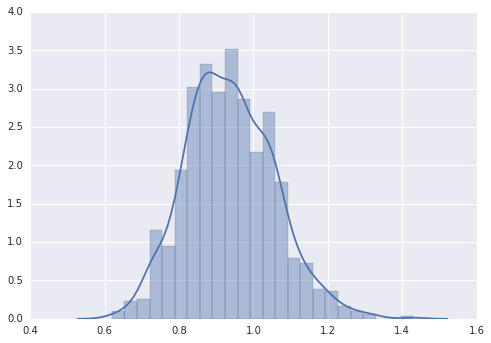

In [19]:
from seaborn import distplot
distplot(M.trace('late_mean')[:])

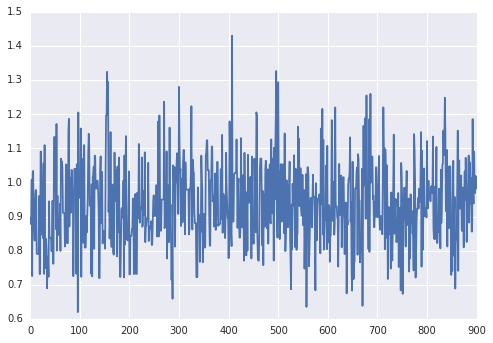

In [25]:
from seaborn import set_style
set_style("darkgrid")
plt.plot(M.trace('late_mean')[:])

Plotting switchpoint
Plotting early_mean
Plotting late_mean


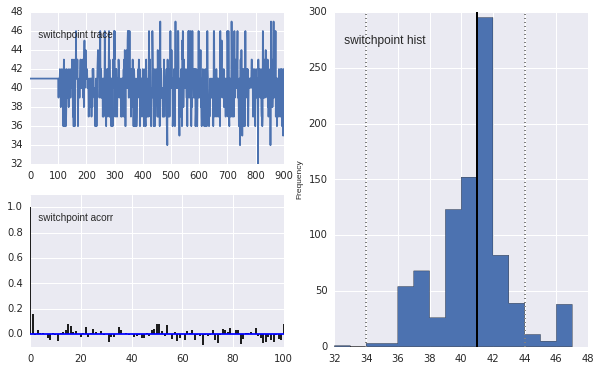

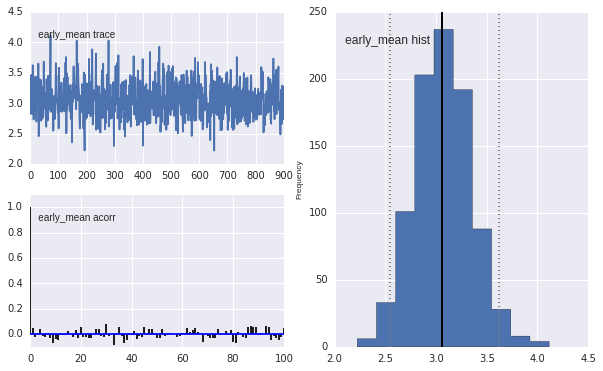

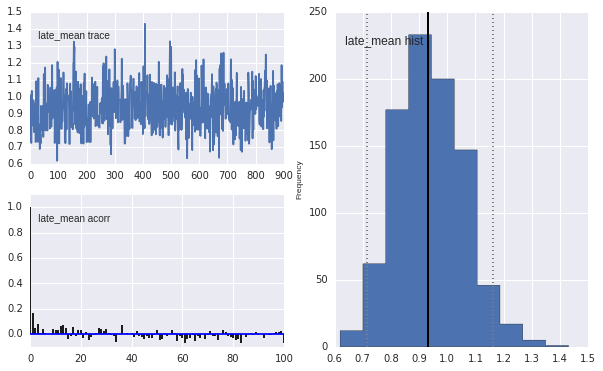

In [26]:
from pymc.Matplot import plot
plot(M)